# Problem Set 4, due '05/23/2017' at 3:30pm.

### Before You Start

This is a fun but challenging problem set. It will test your python skills, as well as your understanding of the material in class and in the readings. Start early and debug often! Some notes:

* Part 1 is meant to be easy, so get through it quickly.
* Part 2 (especially 2.1) will be difficult, but it is the lynchpin of this problem set to make sure to do it well and understand what you've done. If you find your gradient descent algorithm is taking more than a few minutes to complete, debug more, compare notes with others, and go to the TA sessions.
* Depending on how well you've done 2.1, parts 2.3 and 4.3 will be relatively painless or incredibly painful. 
* Part 4 (especially 3.3) will be computationally intensive. Don't leave this until the last minute, otherwise your code might be running when the deadline arrives.
* Do the extra credit problems last.

---

## Introduction to the assignment

As with the last assignment, you will be using the [Boston Housing Prices Data Set](http://archive.ics.uci.edu/ml/datasets/Housing).

In [107]:
import IPython
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib
import sklearn

%matplotlib inline  
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import time

In [108]:
from sklearn.datasets import load_boston
bdata = load_boston()

---

## Part 1: Getting oriented

Use different learning rates

### 1.1 Use existing libraries

Soon, you will write your own gradient descent algorithm, which you will then use to minimize the squared error cost function.  First, however, let's use the canned versions that come with Python, to make sure we understand what we're aiming to achieve.

Using the same Boston housing prices dataset, use the [Linear Regression class](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) from sklearn or the [OLS class](http://wiki.scipy.org/Cookbook/OLS) from SciPy to explore the relationship between  median housing price and number of rooms per house. Do this by first (a) regressing the housing price on the number of rooms per house, and then (b) regressing the housing price on the number of rooms per house and the (number of rooms per house) squared.  Interpret your results.

In [109]:
# uncomment the following if you want to see a lengthy description of the dataset
print "keys:", bdata.keys()
print "feature names:",  bdata.feature_names
print "data shape:", bdata.data.shape
print "target shape", bdata.target.shape
print bdata.DESCR
print "-"*80


keys: ['data', 'feature_names', 'DESCR', 'target']
feature names: ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
data shape: (506L, 13L)
target shape (506L,)
Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Bo

In [110]:
# reset data as pandas DataFrame
boston_df = pd.DataFrame(bdata.data)

# label columns
boston_df.columns = bdata.feature_names

In [111]:
#Add the target of the boston data set, the price. We'll create a new column in our DataFrame
boston_df['Price'] = bdata.target

In [112]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [113]:
from statsmodels.formula.api import ols
#(a) regressing the housing price on the number of rooms per house
#Linear model
lm_fit1= ols(formula='Price ~ RM', data=boston_df).fit()

#Summary of the fitted model
lm_fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Tue, 23 May 2017   Prob (F-statistic):           2.49e-74
Time:                        13:28:30   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.000     -39.877     -29.465
RM             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Interpretation: Keeping other factors unchanged, with a unit increase in the number of rooms, the house price increases by approximately $9000.

In [114]:
#(b) regressing the housing price on the number of rooms per house and the (number of rooms per house) squared
#Linear model
lm_fit2= ols(formula='Price ~ RM + np.power(RM, 2)', data=boston_df).fit()

#Summary of the fitted model
lm_fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.548
Model:                            OLS   Adj. R-squared:                  0.547
Method:                 Least Squares   F-statistic:                     305.4
Date:                Tue, 23 May 2017   Prob (F-statistic):           1.46e-87
Time:                        13:28:31   Log-Likelihood:                -1639.1
No. Observations:                 506   AIC:                             3284.
Df Residuals:                     503   BIC:                             3297.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          66.0588     12.104      5.458      0.000      42.278      89.839
RM                -22.6433      3.754     -6.031      0.000     -30.019     -15.267
np.power(RM, 2)     2.4701      0.291      8.502      0.000       1.899       3.041
==============================================================================
Omnibus:                       82.173   Durbin-Watson:                   0.689
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              934.337
Skew:                           0.224   Prob(JB):                    1.29e-203
Kurtosis:                       9.642   Cond. No.                     1.91e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.91e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [115]:
lm_fit3= ols(formula='Price ~ RM + CRIM', data=boston_df).fit()

#Summary of the fitted model
lm_fit3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     295.9
Date:                Tue, 23 May 2017   Prob (F-statistic):           1.15e-85
Time:                        13:28:31   Log-Likelihood:                -1643.5
No. Observations:                 506   AIC:                             3293.
Df Residuals:                     503   BIC:                             3306.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -29.3017      2.592    -11.303      0.000     -34.395     -24.208
RM             8.3975      0.406     20.706      0.000       7.601       9.194
CRIM          -0.2618      0.033     -7.899      0.000      -0.327      -0.197
==============================================================================
Omnibus:                      170.471   Durbin-Watson:                   0.805
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1034.461
Skew:                           1.331   Prob(JB):                    2.34e-225
Kurtosis:                       9.479   Cond. No.                         92.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Interpretation: The house prices first decreases with the increase in the number of rooms, but later increases for more number of rooms. 

### 1.2 Training and testing

Chances are, for the above problem you used all of your data to fit the regression line. In some circumstances this is a reasonable thing to do, but often this will result in overfitting. Let's redo the above results the ML way, using careful cross-validation.  Since you are now experts in cross-validation, and have written your own cross-validation algorithm from scratch, you can now take a shortcut and use the libraries that others have built for you.

Using the [cross-validation functions](http://scikit-learn.org/stable/modules/cross_validation.html) from scikit-learn, use 250-fold cross-validation to fit regression (a) above, i.e. the linear fit of housing price on number of rooms per house.
Each fold of cross-validation will give you one slope coefficient and one intercept coefficient.  Plot the distribution of the 250 slope coefficients, and draw a vertical line at the value of the slope coefficient that you estimated in 1.1 using the full dataset.  What do you notice?

Note: please use 'random_state=1' and keep 'shuffle=False' when doing the KFold splitting to ensure reproducibility!

In [116]:
#Splitting the data into RM and House Price Data
X = bdata.data[:,5].reshape(-1,1)
Y = bdata.target.reshape(-1,1)

#Importing Kfold and Linear Model
from sklearn.model_selection import KFold
from sklearn import linear_model

#Calling the Linear Regression Function
regr = linear_model.LinearRegression()

#250-fold cross validation
kf = KFold(n_splits=250, random_state=1, shuffle=False)

#Creating an empty array for slopes
slopes = []

#Calculating slopes for each of the 250 folds.
for train_index, test_index in kf.split(X):
    coef = (regr.fit(X[train_index], Y[train_index]).coef_)
    slopes.append( coef )

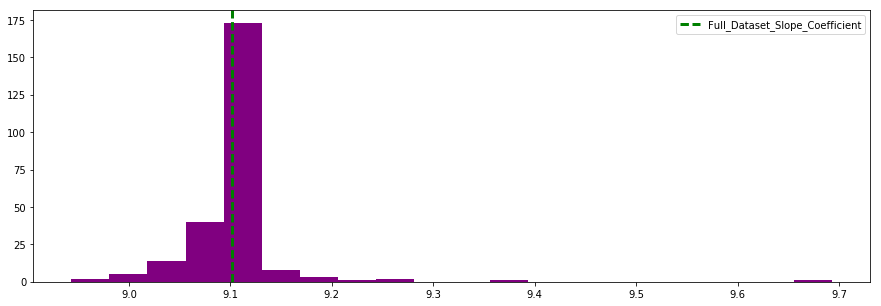

In [117]:
#Preparing to plot. Bringing Slopes array into a list format
slopes = np.asarray(slopes)
slopes = list(slopes.reshape(1,-1))

#Plot the distribution of slopes across 250 folds
fig,ax= plt.subplots(nrows=1)
ax.hist(slopes, bins=20, color='purple')
fig.set_size_inches(15,5)
ax.axvline(lm_fit1.params[1], color='green', linestyle='dashed', linewidth=3, label='Full_Dataset_Slope_Coefficient')
ax.legend(loc=0)

### 1.3 Regression lines

Create a scatterplot of housing price on rooms per house, and add the two regression lines from 1.1 (or 1.2 if you prefer to do so). Show the linear regression line in red, and the linear+quadratic regression line (which may have curvature) in blue.  Label these two regression lines with the corresponding regression equations (i.e. the slope and intercept of the line).

Bonus: Add the 95% confidence bands (i.e.,  the area that has a 95% chance of containing the true regression line) to each of these lines.

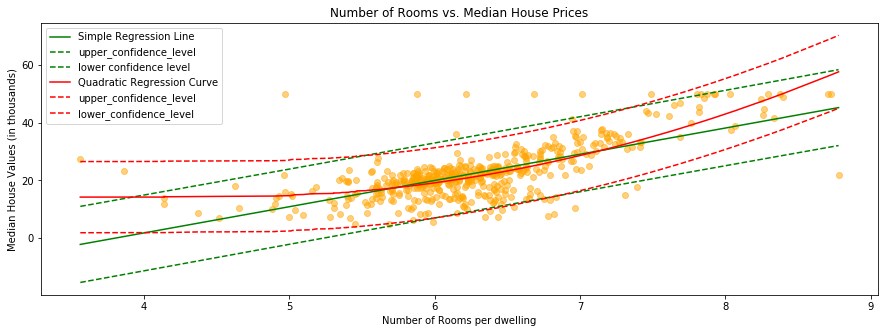

In [118]:
fig,ax= plt.subplots(nrows=1)
ax.scatter(X,Y, color='orange', alpha=0.5)
fig.set_size_inches(15,5)
#ax.legend(loc=0)
#X_plot = np.linspace(0,1,100)
#Create the Line for Lm_fit_1
line1 = lm_fit1.params[0] + lm_fit1.params[1]*X

#Create the confidence intervals for Lm_fit_1
values, conf_int1_lower, conf_int1_upper = wls_prediction_std(lm_fit1)

#plot the lines
ax.plot(np.sort(X, axis=0), np.sort(line1, axis=0), color='green', 
        label='Simple Regression Line')
ax.plot(np.sort(X,axis=0), np.sort(conf_int1_lower, axis=0), color='green', 
        linestyle = 'dashed', label='upper_confidence_level')
ax.plot(np.sort(X, axis=0), np.sort(conf_int1_upper, axis=0), color='green', 
        linestyle = 'dashed', label='lower confidence level')

#Create the Line for Lm_fit_1
line2 = lm_fit2.params[0] + lm_fit2.params[1]*X + lm_fit2.params[2]*np.power(X,2)

#Create the confidence intervals for Lm_fit_1
values, conf_int2_lower, conf_int2_upper = wls_prediction_std(lm_fit2)

#Plot the line
ax.plot(np.sort(X, axis=0), np.sort(line2, axis=0), color='red',
        label='Quadratic Regression Curve')
ax.plot(np.sort(X, axis=0), np.sort(conf_int2_lower, axis=0), color='red', 
        linestyle = 'dashed', label = 'upper_confidence_level')
ax.plot(np.sort(X, axis=0), np.sort(conf_int2_upper,axis=0), color='red', 
        linestyle = 'dashed', label = 'lower_confidence_level')

ax.legend(loc=0)

#Lables
ax.set_title('Number of Rooms vs. Median House Prices')
ax.set_xlabel('Number of Rooms per dwelling')
ax.set_ylabel('Median House Values (in thousands)')


## Part 2: Gradient descent: Linear Regression

This is where it gets fun!

### 2.1 Implement gradient descent with one independent variable (Average rooms per house)

Implement the batch gradient descent algorithm that we discussed in class. Use the version you implement to regress the housing price on the number of rooms per house. Experiment with 3-4 different values of the learning rate *R*, and do the following:

* Report the values of alpha and beta that minimize the loss function
* Report the number of iterations it takes for your algorithm to converge (for each value of *R*)
* Report the total running time of your algorithm, in seconds

Some skeleton code is provided below, but you should feel free to delete this code and start from scratch if you prefer.

* *Hint 1: Don't forget to implement a stopping condition, so that at every iteration you check whether your results have converged. Common approaches to this are to (a) check to see if the loss has stopped decreasing; and (b) check if both your current parameter esimates are close to the estimates from the previous iteration.  In both cases, "close" should not be ==0, it should be <=epsilon, where epsilon is something very small (like 0.0001).*
* *Hint 2: It is always useful to include maximum number of iterations, otherwise a rogue estimation may go on forever.*

In [119]:
"""
    Function
    --------
    bivariate_ols: Gradient Decent to minimize OLS. Used to find coefficients of bivariate OLS Linear regression

    Parameters
    ----------
    xvalues, yvalues : narray xvalues: independent variable; yvalues: dependent variable
    R: float, Learning rate
    MaxIterations: Int, maximum number of iterations

    Returns
    -------
    alpha: float, intercept
    beta: float, co-efficient
    ttaken: time taken
    it: number of iterations
    convergence: logical, convergence achieved?
"""
import time
def bivariate_ols(xvalues, yvalues, R, MaxIterations, epsilon=0.0001):
    
    start_time = time.time()
    #Get the number of training samples (m) and the number of features (n)
    m, n = np.shape(xvalues)
    
    #initial Values for alpha and beta
    alpha = np.random.random(n)
    beta = np.random.random(n) 
    
    #X transpose
    x_transpose = xvalues.transpose()
   
    for i in range(MaxIterations):
        #Cost Function
        #State the hypothesis
        hypothesis = alpha + np.dot(xvalues, beta)
        #Compute Loss
        loss = hypothesis - yvalues
        #Compute the Cost Function J
        J = ((np.sum(loss ** 2) / (2 * m)))
        #print("Iteration %d | Cost: %f" % (i, J))

        #Compute Gradient for alpha and beta
        gradient_alpha = (np.sum(loss) / m)
        gradient_beta = (np.dot(x_transpose, loss) / m)

        #Update alpha and beta
        alpha = alpha - R*gradient_alpha
        beta = beta - R*gradient_beta
            
        #Compute new cost function
        hypothesis_new = alpha + np.dot(xvalues, beta)
        #Compute Loss
        loss_new = hypothesis_new - yvalues
        #Compute the Cost Function J
        J_new = ((np.sum(loss_new ** 2) / (2 * m)))

        #Stopping condition
        if abs(J_new - J) <= epsilon:
            print ('Converged, Iterations:', i)
            break
    print 'Time Taken is : ' + str(time.time() - start_time)        
    return alpha, beta[0][0:n]

In [120]:
#R = 0.0009
int1, slope1 = bivariate_ols(X, Y, 0.0009, 20000)

('Converged, Iterations:', 13595)
Time Taken is : 140.845000029


In [121]:
int1,slope1

(array([-34.47428359]), array([ 9.07089637]))

In [122]:
#R = 0.0008
int2, slope2 = bivariate_ols(X, Y, 0.0008, 20000)

('Converged, Iterations:', 14987)
Time Taken is : 148.588000059


In [123]:
int2, slope2

(array([-34.46236632]), array([ 9.06900182]))

In [124]:
#R = 0.001
int3,slope3 = bivariate_ols(X, Y, 0.001, 20000)

('Converged, Iterations:', 12244)
Time Taken is : 119.351999998


In [125]:
int3,slope3

(array([-34.48440838]), array([ 9.07250595]))

### 2.2 Data normalization (done for you!)

Soon, you will implement a version of gradient descent that can use an arbitrary number of independent variables. Before doing this, we want to give you some code in case you want to standardize your features.

In [126]:
def standardize(raw_data):
    """
    standardizes raw data and returns
    standardized data, mean by column, sd by column
    """
    mu = np.mean(raw_data, axis = 0)
    sd = np.std(raw_data, axis = 0)
    return (raw_data - mu) / sd, mu, sd


### 2.3 Implement gradient descent with an arbitrary number of independent variables

Now that you have a simple version of gradient descent working, create a version of gradient descent that can take more than one independent variable.  Assume all independent variables will be continuous.  Test your algorithm using CRIM and RM as independent variables. Standardize these variables before before inputting them to the gradient descent algorithm. 

As before,  report and interpret your estimated coefficients, the number of iterations before convergence, and the total running time of your algorithm. Experiment with the following values of R: 0.1, 0.01, and 0.001.

* *Hint 1: Be careful to implement this efficiently, otherwise it might take a long time for your code to run. Commands like `np.dot` can be a good friend to you on this problem*

In [127]:
"""
Function
--------
multiple_ols
    Gradient Decent to minimize OLS. Used to find co-efficients of bivariate OLS Linear regression

Parameters
----------
xvalue_matrix, yvalues : narray
    xvalue_matrix: independent variable
    yvalues: dependent variable
    
R: float
    Learning rate
    
MaxIterations: Int
    maximum number of iterations

feature_indices: List
    features you want to consider

Returns
-------
coeffs: array[float], coefficients
"""
def multiple_ols(xvalues, yvalues, R, MaxIterations, feature_indices, epsilon=0.0001):
    
    start_time = time.time()
    
    #Preparing the Data
    #Extracting features
    xvalues = xvalues[:,feature_indices]
  
    #Get the number of training samples (m) and the number of features (n)
    m, n = np.shape(xvalues)
    
    #initial Values for coefficients
    coeffs = np.random.random(n+1).reshape(-1,1)
    
    #Inserting a column of ones to xvalues
    xvalues = np.c_[ np.ones(m), xvalues ] 
    
    #X transpose
    x_transpose = xvalues.transpose()
    
    for i in range(MaxIterations):
        
        #Cost Function
        #State the hypothesis
        hypothesis = np.dot(xvalues, coeffs)
        
        #Compute Loss
        loss = hypothesis - yvalues
        
        #Compute the Cost Function J
        J = ((np.sum(loss ** 2) / (2 * m)))
        #print("Iteration %d | Cost: %f" % (i, J))
        
        #Compute Gradient for all coeffs
        gradient = (np.dot(x_transpose, loss)) / m
        
        #Update Coefficients
        coeffs = coeffs - R*gradient
    
        #Compute new cost function
        hypothesis_new = np.dot(xvalues, coeffs)
    
        #Compute Loss
        loss_new = hypothesis_new - yvalues
        #Compute the Cost Function J
        J_new = ((np.sum(loss_new ** 2) / (2 * m)))

        #Stopping condition
        if abs(J_new - J) <= epsilon:
            print ('Converged, Iterations:', i)
            break
    print 'Time Taken is : ' + str(time.time() - start_time)   

    return coeffs

In [128]:
#Preparing Data for Gradient Descent - CRIM and RM
X_new = bdata.data
X_new_std = standardize(bdata.data)[0]
Y_new = bdata.target.reshape(-1,1)

In [129]:
#Calling Gradient Descent for multiple features with R - 0.001 
coeffs_1 = multiple_ols(X_new_std, Y_new, 0.001,10000, [0,5])

('Converged, Iterations:', 4244)
Time Taken is : 0.246000051498


In [130]:
coeffs_1

array([[ 22.2246313 ],
       [ -2.27467855],
       [  5.82047022]])

In [131]:
bdata.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], 
      dtype='|S7')

In [132]:
#Calling Gradient Descent for multiple features with R - 0.01
coeffs_2 = multiple_ols(X_new_std, Y_new, 0.01,10000, [0,5])

('Converged, Iterations:', 539)
Time Taken is : 0.0449998378754


In [133]:
coeffs_2

array([[ 22.43594474],
       [ -2.26130217],
       [  5.87148669]])

In [134]:
#Calling Gradient Descent for multiple features with R - 0.1
coeffs_3 = multiple_ols(X_new_std, Y_new, 0.1,10000, [0,5])

('Converged, Iterations:', 63)
Time Taken is : 0.00500011444092


In [135]:
coeffs_3

array([[ 22.50737845],
       [ -2.25502069],
       [  5.88625888]])

Interpretation: The cost function minimizes at the above intercept and co-efficient values. Keeping other factors constant, With every unit rise in the per capita crime rate in Boston, the house prices decreases by 2000 dollars. Similarly, keeping other factors constant, with every unit increase in the number of rooms in a house, the house price increases by 5810 dollars.

### 2.4 Compare standardized vs. non-standardized results

Repeat the analysis from 2.3, but this time do not standardize your variables - i.e., use the original data. Use the same three values of R (0.1, 0.01, and 0.001). What do you notice about the running time and convergence properties of your algorithm?

In [136]:
#Calling Gradient Descent for multiple features with R - 0.001 
coeffs_1 = multiple_ols(X_new, Y_new, 0.001,10000, [0,5])

#Calling Gradient Descent for multiple features with R - 0.01
coeffs_2 = multiple_ols(X_new, Y_new, 0.01,10000, [0,5])

#Calling Gradient Descent for multiple features with R - 0.1
coeffs_3 = multiple_ols(X_new, Y_new, 0.1,10000, [0,5])

('Converged, Iterations:', 7439)
Time Taken is : 0.4359998703
Time Taken is : 0.575000047684


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:71: RuntimeWarning: overflow encountered in square
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:56: RuntimeWarning: overflow encountered in square
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in double_scalars
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:63: RuntimeWarning: invalid value encountered in subtract


Time Taken is : 0.578000068665


In [137]:
coeffs_1

array([[-1.41032901],
       [-0.35498693],
       [ 4.06250257]])

In [138]:
coeffs_2

array([[-19.44901156],
       [ -0.29473326],
       [  6.86617496]])

In [139]:
coeffs_3

array([[ nan],
       [ nan],
       [ nan]])

Coefficients do not converge for R 0.01 and 0.1. Also, time taken with non-normalized features is more than that with normalized features. 

## 3. Prediction

Let's use our fitted model to make predictions about housing prices. Since the focus is now on prediction rather than the interpretation of the coefficients, first standardize your features before proceeding.

### 3.1 Cross-Validation

Unless you were careful above, you probably overfit your data again. Let's fix that in one of two ways. If you're feeling confident, use k-fold cross-validation to re-fit the multiple regression from 2.3 above, and report your estimated coefficients (there should be three, corresponding to the intercept and the two coefficients for CRIM and RM). Or if you want to do the quick and dirty version, randomly divide your data into a training set (66%) and testing set (34%) and use the training set to re-fit the regression from 2.3 above. 

In [140]:
#Standardize data
X_cv_std = standardize(bdata.data)[0]   
Y_cv = bdata.target

#10-fold cross validation
kf = KFold(n_splits=10, random_state=1, shuffle=False)

#Creating an empty array for slopes
co_efficients = []

#Calculating slopes for each of the 10 folds.
for train_index, test_index in kf.split(X_cv_std):
    coef = multiple_ols(X_cv_std[train_index], Y_cv[train_index].reshape(-1,1),0.01, 10000, [0,5])
    co_efficients.append(coef.reshape(1,-1))

#Taking means
mean_coeff_estimates = np.mean(np.asarray(co_efficients), axis = 0)
    
print (mean_coeff_estimates)

('Converged, Iterations:', 541)
Time Taken is : 0.0350000858307
('Converged, Iterations:', 543)
Time Taken is : 0.0299999713898
('Converged, Iterations:', 540)
Time Taken is : 0.0350000858307
('Converged, Iterations:', 558)
Time Taken is : 0.0329999923706
('Converged, Iterations:', 557)
Time Taken is : 0.0299999713898
('Converged, Iterations:', 574)
Time Taken is : 0.0350000858307
('Converged, Iterations:', 542)
Time Taken is : 0.0299999713898
('Converged, Iterations:', 646)
Time Taken is : 0.0479998588562
('Converged, Iterations:', 603)
Time Taken is : 0.0310001373291
('Converged, Iterations:', 535)
Time Taken is : 0.0349998474121
[[ 22.42379628  -2.27881573   5.86230717]]


The coefficients are 22.422, -2.278, 5.862

### 3.2 Predicted values and RMSE

Let's figure out how accurate this predictive model turned out to be. Compute the RMSE on your test cases, i.e. take the model parameters that you found above and compare the actual to the predicted values for just the test instances. If you did this the k-fold way above, this will be the average RMSE across the k test sets. If you did this the quick and dirty way above, this will just be the RMSE on your single test set.

What is your test RMSE?  How does it compare to the performance of your nearest neighbor algorithm from the last problem set?  How does it compare to RMSE from a simpler model where number of rooms is the only explanatory variable?

In [141]:
import math
#Function to compute rmses
def compute_rmse(predictions,y_values):
    sq_error = (predictions - y_values)**2
    sum_sq_error = sq_error.sum()
    rmse = math.sqrt(sum_sq_error/float(len(predictions)))
    return rmse

In [142]:
#Preparing the data

for train_index, test_index in kf.split(X_cv_std):
    x_test = X_cv_std[test_index]
    y_test = Y_cv[test_index].reshape(-1,1)
    
    #Inserting ones in first column to account for intercept
    x_cv_test = np.c_[ np.ones(len(x_test)).reshape(-1,1), x_test[:,[0,5]] ] 
    
    #Predictions from coef computed above
    predictions = np.dot(x_cv_test,coef)
    
    #Create an empty array for RMSEs
    rmses = []
    rmses.append(compute_rmse(predictions,y_test))

#Taking means
mean_rmse = np.mean(rmses)
print("Mean RMSE:", mean_rmse)

('Mean RMSE:', 4.2886014005083961)


The test RMSE is 4.28. It is much lower as compared to the KNN RMSE of 7.01. This may be because in KNN, prediction suffers due to lot of approximation. It's interesting!

### Extra Credit 1: Logistic Regression

For extra credit, implement logistic regression using gradient descent. Create a new variable (EXPENSIVE) to indicate whether the median housing price is more than $40,000. Use your model  a logistic regression of EXPENSIVE on CHAS and RM. Report your results.

In [143]:
#Function to check if the house is expensive
def expensive_check(x):
    if x > 40:
        return 1
    else:
        return 0

In [144]:
#Applying the function on the Prices
boston_df['EXPENSIVE'] = boston_df['Price'].apply(expensive_check)

In [145]:
#Converting the dataframe to a numpy array
bdata_logistic = np.asarray(boston_df)

In [146]:
def sigmoid(z):  
    return 1 / (1 + np.exp(-z))

In [147]:
"""
Function
--------
logistic_gd
    Gradient Decent to minimize OLS. Used to find co-efficients of Logistic Regression

Parameters
----------
xvalue_matrix, yvalues : narray
    xvalue_matrix: independent variable
    yvalues: dependent variable
    
R: float
    Learning rate
    
MaxIterations: Int
    maximum number of iterations

feature_indices: List
    features you want to consider

Returns
-------
coeffs: array[float], coefficients
"""
def logistic_gd(xvalues, yvalues, R, MaxIterations, feature_indices, epsilon=0.0001):
    
    start_time = time.time()
    
    #Extracting features
    xvalues = xvalues[:,feature_indices]

    #Get the number of training samples (m) and the number of features (n)
    m, n = np.shape(xvalues)
    
    #initial Values for coefficients
    coeffs = np.random.random(n+1).reshape(-1,1)
    
    #Inserting a column of ones to xvalues
    xvalues = np.c_[ np.ones(m), xvalues ] 
    #Reshaping the yvalues
    yvalues = yvalues.reshape(-1,1)
    
    #X transpose
    x_transpose = xvalues.transpose()
    
    for i in range(MaxIterations):
        
        #Cost Function
        #State the hypothesis
        hypothesis = sigmoid(np.dot(xvalues,coeffs))
        
        #Compute Loss
        loss = hypothesis - yvalues
        
        #Compute the Cost Function J
        first = np.dot((yvalues.transpose()), np.log(hypothesis))
        second = np.dot(((1 - yvalues).transpose()), np.log(1 - hypothesis))
        J = np.sum(first + second) / (-m)
        
        #print("Iteration %d | Cost: %f" % (i, J))
        
        #Compute Gradient for all coeffs
        gradient = (np.dot(x_transpose, loss)) / m
        
        #Update Coefficients
        coeffs = coeffs - R*gradient
        
        #Compute new cost function
        hypothesis_new = sigmoid(np.dot(xvalues,coeffs))
    
        #Compute Loss
        loss_new = hypothesis_new - yvalues
        
        #Compute the Cost Function J
        first_new = np.dot((yvalues.transpose()), np.log(hypothesis_new))
        second_new = np.dot(((1 - yvalues).transpose()), np.log(1 - hypothesis_new))
        J_new = np.sum(first_new + second_new) / (-m)

        #Stopping condition
        if abs(J_new - J) <= epsilon:
            print ('Converged, Iterations:', i)
            break
    print 'Time Taken is : ' + str(time.time() - start_time) 
    
    return coeffs

In [148]:
#Calling the logistic regression function for R = 0.0001 and features CHAS and RM
logistic_gd(X_new_std, bdata_logistic[:,14], 0.001, 20000, [3,5])

('Converged, Iterations:', 2239)
Time Taken is : 0.365000009537


array([[-0.52665968],
       [ 0.20716832],
       [ 0.37796112]])

Thus, we have the Logistic Regression co-efficients above. 
Interpretation: Keeping other factors unchanged, if a house is bounded by the Charles River, its log odds of being expensive increases by 0.53. Also, keeping other factors constant, if  the number of rooms is increased by 1, the log odds of a house being expensive increases by 0.48.

In [149]:
bdata.data[:,[3,5]].shape

(506L, 2L)

## 4 Regularization 

### 4.1 Get prepped

Step 1: Create new interaction variables between each possible pair of the F_s features.  Note: as all the original features are numeric, you can just multiply.  If you originally had *K* features, you should now have K+(K*(K+1))/2 features. Standardize all of your features.

Step 2: For simplicity, generate a single training and testing set.  Randomly sample 66% of your data and call this the training set, and set aside the remaining 34% as your test set.

In [150]:
#Step1: Creating Interaction Variables

# create interaction terms 
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(include_bias=False)
poly_bdata = poly.fit_transform(bdata.data)

#Number of interaction features
n_features = poly_bdata.shape[1]

#Standardizing the features
bdata_interaction_std = standardize(poly_bdata)[0]

#Checking if we have K+(K*(K+1))/2 features
bdata_interaction_std.shape

(506L, 104L)

In [151]:
#Step2 - Splitting the Data

#Adding the target column into the boston data
bdata_std_with_target= np.insert(bdata_interaction_std, bdata_interaction_std.shape[1],bdata.target, axis = 1)

#Setting the seed and randomly shuffling the data
np.random.seed(seed=9)
np.random.shuffle(bdata_std_with_target)

#Slicing 66% of the random data for training set and 34% for test set.
train_row_num = int(math.ceil(0.66*len(bdata_std_with_target)))

#Splitting the data
bdata_x_train = bdata_std_with_target[0:train_row_num,0:103]
bdata_x_test = bdata_std_with_target[train_row_num:len(bdata_std_with_target),0:103]

bdata_y_train = bdata_std_with_target[0:train_row_num,104].reshape(-1,1)
bdata_y_test = bdata_std_with_target[train_row_num:len(bdata_std_with_target),104].reshape(-1,1)


### 4.2 Let's overfit!
Now, using your version of multiple regression from 2.3, let's overfit the training data. Using your training set, regress housing price on as many of those K+(K*(K+1))/2 features as you can.  If you get too greedy, it's possible this will take a long time to compute, so start with 5-10 features, and if you have the time, add more features.

Report the RMSE when you apply your model to your training set and to your testing set. How do these numbers compare to each other, and to the RMSE from 3.2 and nearest neighbors?

In [152]:
#RMSE for Training Set
#Calling the multiple_ols on training data
coeff_interaction_train = multiple_ols(bdata_x_train, bdata_y_train, 0.005, 10000,range(103))

#Inserting ones in first column to account for intercept
bdata_x_train_new = np.c_[np.ones(len(bdata_x_train)).reshape(-1,1), bdata_x_train]
pred_train = np.dot(bdata_x_train_new,coeff_interaction_train)

#Compute RMSE
compute_rmse(pred_train,bdata_y_train)

('Converged, Iterations:', 9623)
Time Taken is : 1.0680000782


2.8843907396712685

In [153]:
#RMSE for Test Set
#Calling the multiple_ols on training data
coeff_interaction_test = multiple_ols(bdata_x_test, bdata_y_test, 0.005, 20000,range(103))

#Inserting ones in first column to account for intercept
bdata_x_test_new = np.c_[np.ones(len(bdata_x_test)).reshape(-1,1), bdata_x_test]
pred_test = np.dot(bdata_x_test_new,coeff_interaction_test)

#Compute RMSE
compute_rmse(pred_test,bdata_y_test)

('Converged, Iterations:', 10476)
Time Taken is : 1.04500007629


3.1714160778902625

The training RMSE (2.88) is lesser than test RMSE (3.17). This is due to overfitting. The RMSE from 3.2 is 4.288, which was considering only 2 features. We have to select the number of features carefully to minimize both training and test RMSEs.

### 4.3 Ridge regularization
a) Incorporate L2 (Ridge) regularization into your multiple_ols regression. Write a new version of your gradient descent algorithm that includes a regularization term "lambda" to penalize excessive complexity. 

b) Use your regularized regression to re-fit the model from 4.2 above on your training data. Try this for several different values of lambda, and report your RMSE for each lambda separately for your training and testing data. How do these numbers compare to each other, to the RMSE from 4.2,  to the RMSE from 2.3, and to the RMSE from nearest neighbors?

c) Go brag to your friends about how you just implemented ridge-regularized multiple regression using gradient descent optimization, from scratch (if you still have any friends left...)

In [154]:
def ridge_multiple_ols(xvalues, yvalues, R, MaxIterations, feature_indices, lamb,epsilon=0.0001):
    start_time = time.time()
    
    #Preparing the Data
    #Extracting features
    xvalues = xvalues[:,feature_indices]
  
    #Get the number of training samples (m) and the number of features (n)
    m, n = np.shape(xvalues)
    
    #initial Values for coefficients
    coeffs = np.random.random(n+1).reshape(-1,1)
    alpha = coeffs[0]
    betas = coeffs[1:len(coeffs)]
    
    #Inserting a column of ones to xvalues
    xvalues = np.c_[ np.ones(m), xvalues ] 
    
    #X transpose
    x_transpose = xvalues.transpose()
    
    for i in range(MaxIterations):
        
        #Cost Function
        #State the hypothesis
        hypothesis = np.dot(xvalues, coeffs)
        
        
        #Compute Loss
        loss = hypothesis - yvalues
        
        #Compute the Cost Function J
        J = ((np.sum(loss ** 2)) + (lamb*np.sum(betas**2))) / (2 * m)
        #print("Iteration %d | Cost: %f" % (i, J))
        
        #Compute Gradient for all coeffs
        gradient_alpha = (np.dot(x_transpose[0,:], loss)) / m
        gradient_beta = (np.dot(x_transpose[1:len(x_transpose),:], loss)) / m
        
        #Update Coefficients
        alpha = alpha - R*gradient_alpha
        betas = betas*(1 - R*(lamb/m)) - R*gradient_beta
       
        #Concatenating Co-efficients
        coeffs = np.concatenate((alpha.reshape(-1,1),betas),axis=0)
        
        #Compute new cost function
        hypothesis_new = np.dot(xvalues, coeffs)
    
        #Compute Loss
        loss_new = hypothesis_new - yvalues
        #Compute the Cost Function J
        J_new = ((np.sum(loss_new ** 2)) + (lamb*np.sum(betas**2))) / (2 * m)

        #Stopping condition
        if abs(J_new - J) <= epsilon:
            print ('Converged, Iterations:', i)
            break
    print 'Time Taken is : ' + str(time.time() - start_time)   

    return coeffs

In [156]:
#Calling Ridge Regression with Lambda = 1000
coeff_ridge_train = ridge_multiple_ols(bdata_x_train, bdata_y_train, 0.01, 10000, range(103), 0.0001,epsilon=0.0001)
pred_ridge_train = np.dot(bdata_x_train_new, coeff_ridge_train)
rmse1_train = compute_rmse(pred_ridge_train,bdata_y_train)

#Calling Ridge Regression with Lambda = 1000
coeff_ridge_test = ridge_multiple_ols(bdata_x_test, bdata_y_test, 0.01, 10000, range(103), 0.0001,epsilon=0.0001)
pred_ridge_test = np.dot(bdata_x_test_new, coeff_ridge_test)
rmse1_test = compute_rmse(pred_ridge_test,bdata_y_test)

#Calling Ridge Regression with Lambda = 5000
coeff_ridge_train = ridge_multiple_ols(bdata_x_train, bdata_y_train, 0.01, 10000, range(103), 0.01,epsilon=0.0001)
pred_ridge_train = np.dot(bdata_x_train_new, coeff_ridge_train)
rmse2_train = compute_rmse(pred_ridge_train,bdata_y_train)

#Calling Ridge Regression with Lambda = 5000
coeff_ridge_test = ridge_multiple_ols(bdata_x_test, bdata_y_test, 0.01, 10000, range(103), 0.01,epsilon=0.0001)
pred_ridge_test = np.dot(bdata_x_test_new, coeff_ridge_test)
rmse2_test = compute_rmse(pred_ridge_test,bdata_y_test)

#Calling Ridge Regression with Lambda = 2500
coeff_ridge_train = ridge_multiple_ols(bdata_x_train, bdata_y_train, 0.01, 10000, range(103), 0.1,epsilon=0.0001)
pred_ridge_train = np.dot(bdata_x_train_new, coeff_ridge_train)
rmse3_train = compute_rmse(pred_ridge_train,bdata_y_train)

#Calling Ridge Regression with Lambda = 2500
coeff_ridge_test = ridge_multiple_ols(bdata_x_test, bdata_y_test, 0.01, 10000, range(103), 0.1,epsilon=0.0001)
pred_ridge_test = np.dot(bdata_x_test_new, coeff_ridge_test)
rmse3_test = compute_rmse(pred_ridge_test,bdata_y_test)

('Converged, Iterations:', 7144)
Time Taken is : 1.27999997139
('Converged, Iterations:', 8863)
Time Taken is : 1.3259999752
('Converged, Iterations:', 7032)
Time Taken is : 1.19400000572
('Converged, Iterations:', 8726)
Time Taken is : 1.26699995995
('Converged, Iterations:', 6951)
Time Taken is : 1.08100008965
('Converged, Iterations:', 8301)
Time Taken is : 1.1859998703


In [157]:
#Result
result = pd.DataFrame([rmse1_train, rmse1_test, rmse2_train, rmse2_test, rmse3_train, rmse3_test])
result['Data'] = ['Train', 'Test', 'Train', 'Test', 'Train', 'Test']
result['Lambda'] = ['0.0001', '0.0001','0.01','0.01', '0.1','0.1']
result.columns = ['RMSE', 'Data', 'Lambda']
print(result)

       RMSE   Data  Lambda
0  2.771845  Train  0.0001
1  3.019866   Test  0.0001
2  2.776601  Train    0.01
3  3.010797   Test    0.01
4  2.777714  Train     0.1
5  3.040144   Test     0.1


As lambda increases, the RMSE remains more or less the same. However, the co-efficients are more penalized as lambda increases. In short, we are decreasing our budget as we're increasing lambda. From the above results, we can see that the RMSE for test data is higher than training data. The RMSE for all these different values of lambda is smaller than that computed considering overfitted data in 4.2. It's definitely better than KNN's RMSE of 7.01.

### Extra Credit 2: Cross-validate lambda

Use k-fold cross-validation to select the optimal value of lambda. Report the average RMSE across all training sets, and the average RMSE across all testing sets. How do these numbers compare to each other, to the RMSE from your previous efforts?  Finally, create a plot that shows RMSE as a function of lambda.

### (Showoff) Extra Credit 3: Lambda and coefficients

If you're feeling extra-special, create a parameter plot that shows how the different coefficient estimates change as a function of lambda. To make this graph intelligible, only include the *K* original F_s features in this plot